## Alexander Reeves, UNE COSC102 Data Science Assignment 2
#### areeve28@myune.edu.au
#### Plant Classification

This project aims to train a computer on a dataset so that it can predict the site of a Cobra Lily plant 
when given two variables

This project uses Python and the Scikit-Learn library, and can be run by pressing play on this page
when loaded within a Jupyter Notebook.

There is also an acompanying PDF report, and video walkthrough.

#### 1. Load the dataset and partition the dataset in the train and test sets.

In [8]:
#Import the required libraries for this project

import numpy as np #Python number library
import matplotlib.pyplot as plt #Graph plotting library
import pandas as pd #Pandas to load and handle the dataset
from sklearn.linear_model import SGDClassifier #Machine learning classifier algorythm
from sklearn.model_selection import cross_val_predict #Prediction based on the classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay #Confusion Matrix library
from sklearn.model_selection import train_test_split #Splitting our training and testing data


#Review the performance of our classifier
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc

In [9]:
#Load the data set from a csv using a convenient re-usable function
def load_dataset(Data_loc):
    return pd.read_csv(Data_loc)

#Load the data via the function
plants_data = load_dataset('./data/Plants_Dataset.csv')

#Alternatively, for a single data sets, we could load with this line
#weather_data = pd.read_csv("./data/Plants_Dataset.csv")

#Check the data is loaded correctly
plants_data.head()
#print(plants_data.target_names)
#Convert to numpy data as that will work with the functions/libraries
plants_data = plants_data.to_numpy()
print(plants_data)

[['TJH' 654 38.4 ... 49.43 5.5 0.93]
 ['TJH' 413 22.2 ... 50.24 5.63 0.94]
 ['TJH' 610 31.2 ... 50.77 5.58 1.08]
 ...
 ['HD' 648 22.7 ... 47.76 5.81 1.3]
 ['HD' 595 31.5 ... 49.01 5.97 1.39]
 ['HD' 528 23.4 ... 48.29 5.94 1.16]]


#### Train Test Split the data

In [10]:
#Train, Test, Split the data

#Lowercase y here is denoting a single columns of data, while Capital X has multiple data lines
#Our X data is every row, but only columns starting after col1
X = plants_data[:,1:]
#Our y data is a single column in array location 0
y = plants_data[:,0]

#Create a train test split, default test size of 25%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=12)

#Standardize the data to set a mean of 0 for our classifier
#print(X_train)
mean = X_train.mean(axis=0)
#standard deviation
#Set all of the values to floats to find std
X_train = X_train.astype(float)
std = X_train.std(axis=0)
#Replace each value with it's standard deviation starting at 0
#print("Mean: " ,mean , "  STD: " , std)
X_train = (X_train - mean) / std
print(X_train)
#Our data is now prepped for the SGDClassifier

[[-0.7181863274246763 -0.1743145660210304 -0.856070642746438
  -0.4022356978462199 1.3304629125429794 -0.12196271042711367
  0.28923932154168597 -0.9993513053723643 -0.552080878975287
  0.7265787821864383 1.4317031710401833 -1.1396584635965215
  -0.14065719727299242 0.04192018549001989 0.17822978345880972
  0.3824605052259712 -0.9976445688057168]
 [0.6746598833383323 1.460635846314138 1.9532769542336688
  1.2675860099694392 -0.11373020826351113 1.060847295276231
  -0.19713071104678376 0.8131270536349584 0.15782079409550806
  -0.7780774323876338 -0.3625282955950404 0.49471866988905794
  0.8033191167825037 -1.0138653722996012 0.01963548461834467
  0.6686670302948473 -0.0010381317053130825]
 [-1.3648649252789302 -0.8090600202217432 -0.5564068990685597
  0.3804932276923705 0.9260888387171621 -1.53169815743491
  -0.7109276251721973 -1.2169011300977555 -0.6921930512918912
  -0.3481756567950418 0.5624084187148317 0.3155540988667809
  -0.7987686807192463 0.8563515803557449 0.1940892133428562
 

#### Find the best pair of features to use in future predictions by cross referencing each combination

CV Train: 0 : 1  -  [0.53333333 0.         0.23529412 0.26666667]
CV Train: 0 : 2  -  [0.42424242 0.33333333 0.         0.33333333]
CV Train: 0 : 3  -  [0.27777778 0.         0.         0.48780488]
CV Train: 0 : 4  -  [0.26666667 0.         0.33333333 0.36842105]
CV Train: 0 : 5  -  [0.41666667 0.         0.28571429 0.38095238]
CV Train: 0 : 6  -  [0.41860465 0.         0.19047619 0.5       ]
CV Train: 0 : 7  -  [0.61111111 0.33333333 0.1        0.23529412]
CV Train: 0 : 8  -  [0.14814815 0.33333333 0.41176471 0.34482759]
CV Train: 0 : 9  -  [0.65       0.2        0.43478261 0.34782609]
CV Train: 0 : 10  -  [0.46666667 0.         0.23529412 0.33333333]
CV Train: 0 : 11  -  [0.46808511 0.         0.22222222 0.22222222]
CV Train: 0 : 12  -  [0.58536585 0.         0.11111111 0.26666667]
CV Train: 0 : 13  -  [0.36363636 0.         0.27586207 0.2       ]
CV Train: 0 : 14  -  [0.47272727 0.         0.         0.0952381 ]
CV Train: 0 : 15  -  [0.2962963  0.         0.51612903 0.58823529]
CV T

CV Train: 8 : 4  -  [0.46153846 0.         0.35714286 0.25      ]
CV Train: 8 : 5  -  [0.59090909 0.         0.43478261 0.        ]
CV Train: 8 : 6  -  [0.4        0.25       0.5        0.45714286]
CV Train: 8 : 7  -  [0.52631579 0.5        0.48       0.32      ]
CV Train: 8 : 9  -  [0.51428571 0.25       0.11764706 0.21428571]
CV Train: 8 : 10  -  [0.14814815 0.         0.26666667 0.35555556]
CV Train: 8 : 11  -  [0.54545455 0.22222222 0.         0.32258065]
CV Train: 8 : 12  -  [0.625      0.         0.34482759 0.22222222]
CV Train: 8 : 13  -  [0.34482759 0.         0.54545455 0.21428571]
CV Train: 8 : 14  -  [0.45454545 0.2        0.38095238 0.        ]
CV Train: 8 : 15  -  [0.54054054 0.         0.63636364 0.66666667]
CV Train: 9 : 0  -  [0.65       0.2        0.43478261 0.34782609]
CV Train: 9 : 1  -  [0.7027027  0.44444444 0.32       0.32      ]
CV Train: 9 : 2  -  [0.81081081 0.25       0.4137931  0.18181818]
CV Train: 9 : 3  -  [0.44444444 0.66666667 0.20689655 0.38709677]
CV T

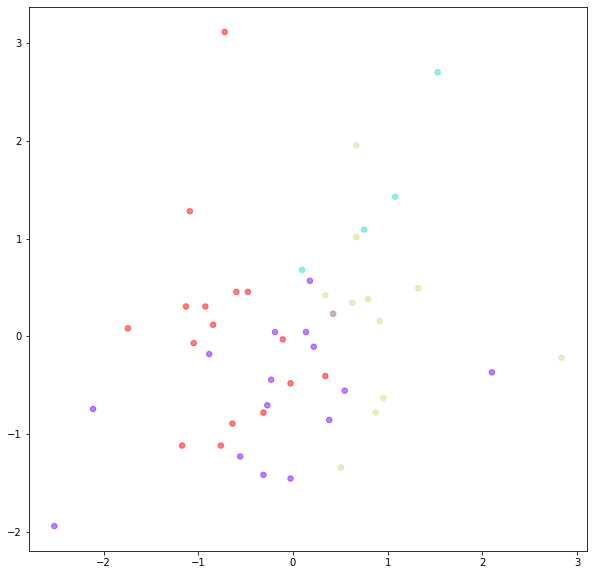

In [13]:
#We need to store the best performance and the features that achieved them.
best_mean_f1 = 0
best_f1 = 0
best_f2 = 0
#best_clf = SGDClassifier();

# We will be testing every combination of pairs of features 

for f1 in range(0,16):
    for f2 in range(0,16):
        
        # We want 2 features, not 1
        if f1 == f2:
            continue
        
        features_idx_to_use = [f1,f2]
        
        clf = SGDClassifier(alpha=0.001, max_iter=100, random_state=42)
        clf.fit(X_train[:,features_idx_to_use], y_train)
        
        # Return the predictions for the 3-Fold crossvalidation
        y_predicted = cross_val_predict(clf, X_train[:,features_idx_to_use],y_train, cv=3)
        
        # Construct the confusion matricies
        conf_mat_train = confusion_matrix(y_train, y_predicted)
        
        # Print out the recall, precision and F1 scores
        # There will be a value for each class
        # CV Train
        #print("CV Train:",f1,":",f2," - ", recall_score(y_train,y_predicted,average=None))
        #print("CV Train:",f1,":",f2," - ",precision_score(y_train,y_predicted,average=None))
        print("CV Train:",f1,":",f2," - ",f1_score(y_train,y_predicted,average=None))

        current_f1 = np.mean(f1_score(y_train,y_predicted,average=None))
        if current_f1 > best_mean_f1:
            best_f1 = f1
            best_f2 = f2
            best_mean_f1 = current_f1
            best_clf = clf

print("Best columns are ",best_f1, " and ", best_f2, ". F1 score = ", best_mean_f1)

            
#Draw the results and we should hopefully see the clear trend just on eye test
fig, ax = plt.subplots(figsize=(10,10))

b, c = np.unique(y_train, return_inverse=True)
print(y_train)
print(c)

#Replace titles with numbers entirely?
y_train = c

ax.scatter(X_train[:,f1], X_train[:,2], c=c, cmap='rainbow', alpha=0.5, s=30)  

In [ ]:
# Now we need to test our classifier using the test set.
# Recall that we standardised the data - we need to do the same with the stored
# Mean and standard deviation from the training set.

X_test = (X_test - mean) / std

y_test_predicted = best_clf.predict(X_test[:,[best_f1, best_f2]])
conf_mat_test = confusion_matrix(y_test, y_test_predicted)

fig, ax = plt.subplots()
disp = ConfusionMatrixDisplay.from_estimator(best_clf, X_test[:,[best_f1, best_f2]], y_test,
                                 cmap=plt.cm.Blues,ax=ax)
#disp = ConfusionMatrixDisplay.from_estimator(best_clf, X_test[:,[best_f1, best_f2]], y_test,
#                                 display_labels=data_set.target_names,
#                                 cmap=plt.cm.Blues,ax=ax)

ax.set_title('Testing')

# Test
print("Test:",recall_score(y_test,y_test_predicted,average=None))
print("Test:",precision_score(y_test,y_test_predicted,average=None))
print("Test:",f1_score(y_test,y_test_predicted,average=None)) 

In [ ]:
h = .02  # step size in the mesh
# create a mesh to plot in
x_min, x_max = X_test[:, best_f1].min() - 1, X_test[:, best_f1].max() + 1
y_min, y_max = X_test[:, best_f2].min() - 1, X_test[:, best_f2].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
Z = best_clf.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
cs = ax.contourf(xx, yy, z2,cmap=plt.get_cmap('plasma'))